# 新竹市火災案件統計表 103-108年2月

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 讀入資料

In [2]:
df = pd.read_csv('http://opendata.hccg.gov.tw/dataset/cb7a7eed-cbd3-493a-98b1-f3def68f41dc/resource/9de3cf1e-79e3-492b-b338-a1c3d2a39537/download/20190307090002985.csv')

In [3]:
df.head()

,年度,月份,火災次數總計,縱火,自殺,燈燭,爐火烹調,敬神掃墓祭祖,菸蒂,電氣因素,...,交通事故,天然災害,遺留火種,原因不明,其他,死亡人數,受傷人數,房屋損失,財物損失,合計
0,103,1,6,0,0,0,1,0,0,2,...,0,0,─,0,0,0,0.0,156,1117,1273
1,103,2,3,1,0,0,0,0,0,2,...,0,0,─,0,0,0,1.0,30,51,81
2,103,3,3,0,0,0,1,0,0,0,...,0,0,─,0,2,0,0.0,30,372,402
3,103,4,2,0,0,0,0,0,0,1,...,0,0,─,0,0,0,0.0,45,15,60
4,103,5,4,0,0,0,1,0,2,1,...,0,0,─,0,0,0,0.0,33,60,93


### 火災發生頻率

In [5]:
freq = []
yr = range(103,108)
for i in range(len(yr)):
    freq.append(df[df['年度'] == yr[i]]['火災次數總計'].sum())
freq

[45, 39, 20, 54, 316]

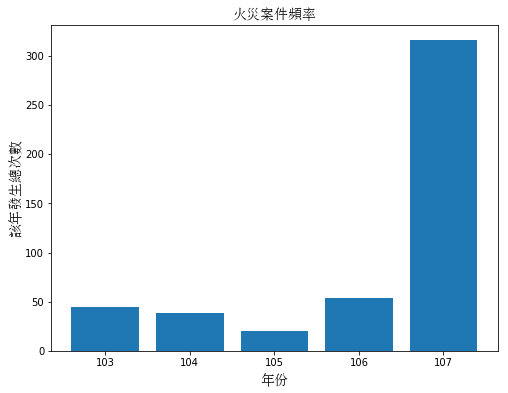

In [6]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) 
plt.figure(figsize=(8,6))
x = ['103','104','105','106','107']
plt.bar(x,np.array(freq))
plt.title('火災案件頻率', fontproperties = font)
plt.xlabel('年份', fontproperties = font)
plt.ylabel('該年發生總次數', fontproperties = font)
plt.show()

In [7]:
df[df.columns[3:23]].head()

,縱火,自殺,燈燭,爐火烹調,敬神掃墓祭祖,菸蒂,電氣因素,機械設備,玩火,烤火,施工不慎,易燃品自燃(復燃),瓦斯漏氣或爆炸,化學物品,燃放爆竹,交通事故,天然災害,遺留火種,原因不明,其他
0,0,0,0,1,0,0,2,0,0,0,2,0,0,1,0,0,0,─,0,0
1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,─,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,─,0,2
3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,─,0,0
4,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,─,0,0


In [8]:
res_freq = []
for i in range(3,23):
    res_freq.append(df[df.columns[i]].sum())

In [9]:
x = list(df['遺留火種'].loc[23:]) 
x = [int(i) for i in x] 

In [10]:
res_freq[17] = sum(x)

In [11]:
res_freq

[14, 0, 3, 39, 41, 56, 104, 9, 2, 2, 15, 3, 2, 6, 11, 1, 0, 18, 0, 212]

In [12]:
fatal = []
for x in res_freq:
    if x > 5:
        fatal.append(x)

### Cause of Fire

We draw a pie plot for differnt causes of fire. 

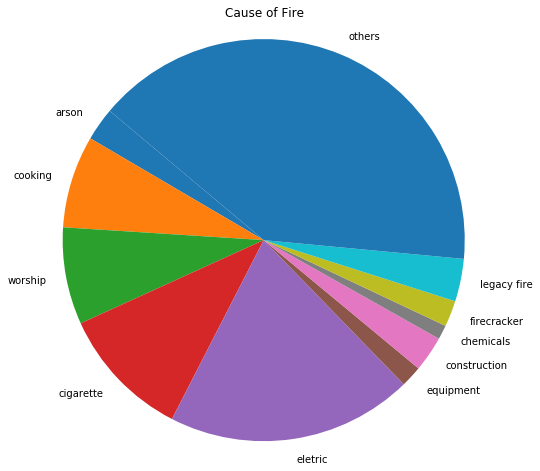

In [13]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
plt.figure(figsize=(8,8))
labels = ['arson','cooking','worship','cigarette','eletric','equipment','construction','chemicals','firecracker','legacy fire',
          'others']
sizes = fatal
plt.pie(sizes, labels=labels, startangle=140)

plt.title('Cause of Fire')
plt.axis('equal')
plt.show();